In [1]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import emoji
import wordninja
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
ds = load_dataset("Jacobvs/PoliticalTweets")

ds = ds["train"].select(range(30000))

Generating train split: 100%|██████████| 190491/190491 [00:00<00:00, 951645.91 examples/s]


In [3]:
df = ds.to_pandas()
df

,index,date,id,username,text,party,labels
0,0,2021-10-13 19:47:44,1448374915636383745,SenatorHassan,Happy th birthday to the @USNavy! The strength...,Democrat,1
1,1,2021-06-30 14:53:13,1410250073003462656,SenatorMenendez,The greatest generation's investment in infras...,Democrat,1
2,2,2021-08-08 01:11:29,1424176405881966599,SenBillCassidy,"Thanks to @SenTedCruz and @SenatorWarnock, th...",Republican,0
3,3,2021-04-14 14:02:49,1382333523567185921,SenBlumenthal,/ To get lasting change we cant just lock up t...,Democrat,1
4,4,2021-12-11 16:06:38,1469700160934621188,SenatorBraun,Today were celebrating years of the Hoosier st...,Republican,0
...,...,...,...,...,...,...,...
29995,30084,2021-09-02 16:06:17,1433461284054441993,JimInhofe,"This week, @POTUS claimed to be putting the na...",Republican,0
29996,30085,2021-10-26 23:38:10,1453143951943286784,SenBlumenthal,We need stronger rules to protect children onl...,Democrat,1
29997,30086,2021-02-24 20:23:40,1364672363179180032,SenJohnBarrasso,.@USCBO has said employment would be reduced b...,Republican,0
29998,30087,2021-04-22 21:20:55,1385342879917252610,RonWyden,Learn more about my bill to improve soil healt...,Democrat,1


In [4]:
for col in df.columns:
    nan = df[col].isna().sum()
    if nan != 0:
        print(f'comlumn name: {col}, number of nan: {nan}')

In [5]:
# labels are as follows
# Democrat   --> 1 
# Republican --> 0

df = df[['text', 'labels']]
df

,text,labels
0,Happy th birthday to the @USNavy! The strength...,1
1,The greatest generation's investment in infras...,1
2,"Thanks to @SenTedCruz and @SenatorWarnock, th...",0
3,/ To get lasting change we cant just lock up t...,1
4,Today were celebrating years of the Hoosier st...,0
...,...,...
29995,"This week, @POTUS claimed to be putting the na...",0
29996,We need stronger rules to protect children onl...,1
29997,.@USCBO has said employment would be reduced b...,0
29998,Learn more about my bill to improve soil healt...,1


# THE DATASET

Here we provide some details about our dataset, including statistics and relevant informations for the study

In [6]:
df['message_len'] = df['text'].apply(lambda x: len(x.split()))
df['num_characters'] = df['text'].apply(len)
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

mean_length = df['num_characters'].mean()

dem_mean_len = df.loc[df['labels'] == 1, 'num_characters'].mean()
rep_mean_len = df.loc[df['labels'] == 0, 'num_characters'].mean()

outlier_count = (df['message_len'] > 50).sum()

dem_lengths = df.loc[df['labels'] == 1, 'message_len']
rep_lengths = df.loc[df['labels'] == 0, 'message_len']

dem_counts = dem_lengths.value_counts().sort_index()
rep_counts = rep_lengths.value_counts().sort_index()

dem_avg = dem_lengths.mean()
rep_avg = rep_lengths.mean()

/tmp/ipykernel_1072/998896436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_len'] = df['text'].apply(lambda x: len(x.split()))
/tmp/ipykernel_1072/998896436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
/tmp/ipykernel_1072/998896436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

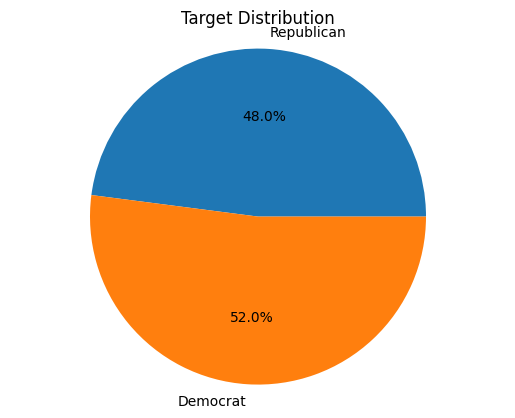

In [7]:
balance_counts = df['labels'].value_counts().sort_index().values
labels = ['Republican', 'Democrat']
plt.pie(balance_counts, labels=labels, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

In [8]:
print(f"Mean Length of Messages: {mean_length:.2f}")
print(f"Mean Length of Democrat Messages: {dem_mean_len:.2f}")
print(f"Mean Length of Republican Messages: {rep_mean_len:.2f}")
print(f"Number of messages with more than 50 words: {outlier_count}")

Mean Length of Messages: 214.82
Mean Length of Democrat Messages: 223.99
Mean Length of Republican Messages: 204.86
Number of messages with more than 50 words: 432


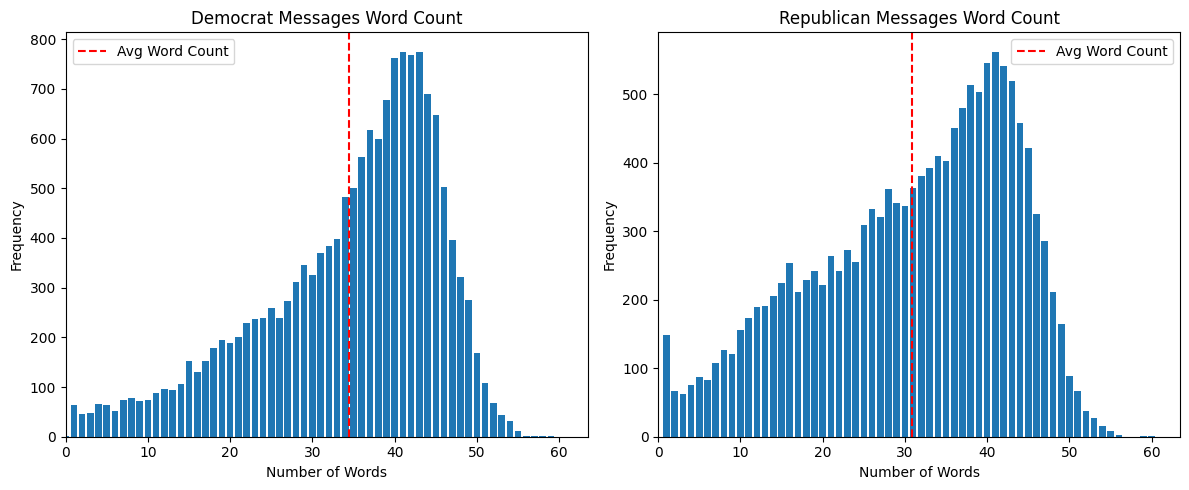

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

ax1.bar(dem_counts.index, dem_counts.values)
ax1.axvline(dem_avg, color='red', linestyle='--', label='Avg Word Count')
ax1.set_title('Democrat Messages Word Count')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2.bar(rep_counts.index, rep_counts.values)
ax2.axvline(rep_avg, color='red', linestyle='--', label='Avg Word Count')
ax2.set_title('Republican Messages Word Count')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
ax2.legend()


plt.xlim(0,)
plt.tight_layout()
plt.show()

### PREPROCESSING

In [10]:
def clean_text(text):
    text = str(text).lower()
    hashtags = re.findall(r"#\w+", text)
    for tag in hashtags:
        split_words = wordninja.split(tag.lstrip("#"))
        text = text.replace(tag, " ".join(split_words))
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'\n', '', text)                                           # newline
    text = re.sub(r'@\w+', '', text)                                         # menzioni (@user)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # link
    text = re.sub(r'\w*\d\w*', '', text)                                     # parole con numeri
    text = re.sub(r'[^\x00-\x7F]+', '', text)                                # caratteri non ASCII
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)          # punteggiatura
    return text


In [11]:
df['text_cleaned'] = df['text'].apply(clean_text)
df.head()

/tmp/ipykernel_1072/3062364211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_cleaned'] = df['text'].apply(clean_text)


,text,labels,message_len,num_characters,num_sentences,text_cleaned
0,Happy th birthday to the @USNavy! The strength...,1,38,276,4,happy th birthday to the the strength dedicat...
1,The greatest generation's investment in infras...,1,40,278,4,the greatest generations investment in infrast...
2,"Thanks to @SenTedCruz and @SenatorWarnock, th...",0,29,211,2,thanks to and the infrastructure investment...
3,/ To get lasting change we cant just lock up t...,1,45,280,2,to get lasting change we cant just lock up th...
4,Today were celebrating years of the Hoosier st...,0,12,98,3,today were celebrating years of the hoosier st...


now we need to remove sopwords: a set of common uninformative words in english language

In [12]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

In [13]:
df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)

df.head()

/tmp/ipykernel_1072/1225836060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)


,text,labels,message_len,num_characters,num_sentences,text_cleaned
0,Happy th birthday to the @USNavy! The strength...,1,38,276,4,happy th birthday strength dedication skill sa...
1,The greatest generation's investment in infras...,1,40,278,4,greatest generations investment infrastructure...
2,"Thanks to @SenTedCruz and @SenatorWarnock, th...",0,29,211,2,thanks infrastructure investment jobs act auth...
3,/ To get lasting change we cant just lock up t...,1,45,280,2,get lasting change cant lock convicted crimes ...
4,Today were celebrating years of the Hoosier st...,0,12,98,3,today celebrating years hoosier state happy bi...


In [14]:
min_tokens = 2

removed_count = df['text_cleaned'].apply(lambda x: isinstance(x, str) and len(x.split()) <= min_tokens).sum()
print(f"Tweets removed (less than {min_tokens} tokens): {removed_count}")


df = df[df['text_cleaned'].apply(lambda x: len(x.split()) > min_tokens)]

Tweets removed (less than 2 tokens): 667


# WORDCLOUD

In [15]:
dem_texts = df[df['labels'] == 1]['text_cleaned']
rep_texts = df[df['labels'] == 0]['text_cleaned']
all_texts = df['text_cleaned']

def get_word_freq(texts):
    word_freq = Counter()
    for text in texts:
        if isinstance(text, str):
            for word in text.split():
                word = word.strip().lower()
                if word:
                    word_freq[word] += 1
    return word_freq

dem_freq = get_word_freq(dem_texts)
rep_freq = get_word_freq(rep_texts)
all_freq = get_word_freq(all_texts)

# Generate WordClouds
wc_dem = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(dem_freq)
wc_rep = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(rep_freq)
wc_all = WordCloud(width=1600, height=600, background_color='white', colormap='viridis').generate_from_frequencies(all_freq)


NameError: name 'Counter' is not defined

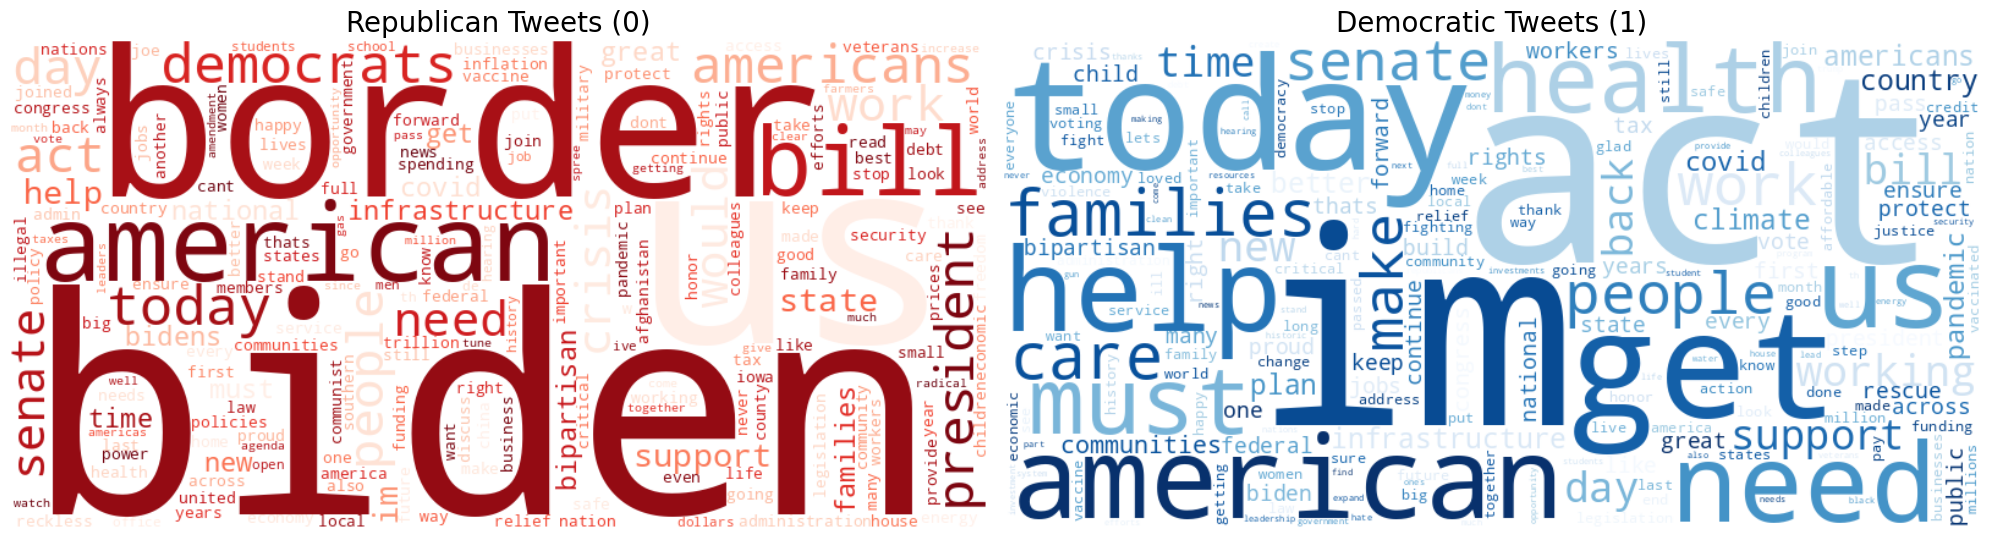

In [54]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.imshow(wc_rep, interpolation='bilinear')
plt.axis('off')
plt.title("Republican Tweets (0)", fontsize=20)

plt.subplot(2, 2, 2)
plt.imshow(wc_dem, interpolation='bilinear')
plt.axis('off')
plt.title("Democratic Tweets (1)", fontsize=20)

plt.tight_layout()
plt.show()

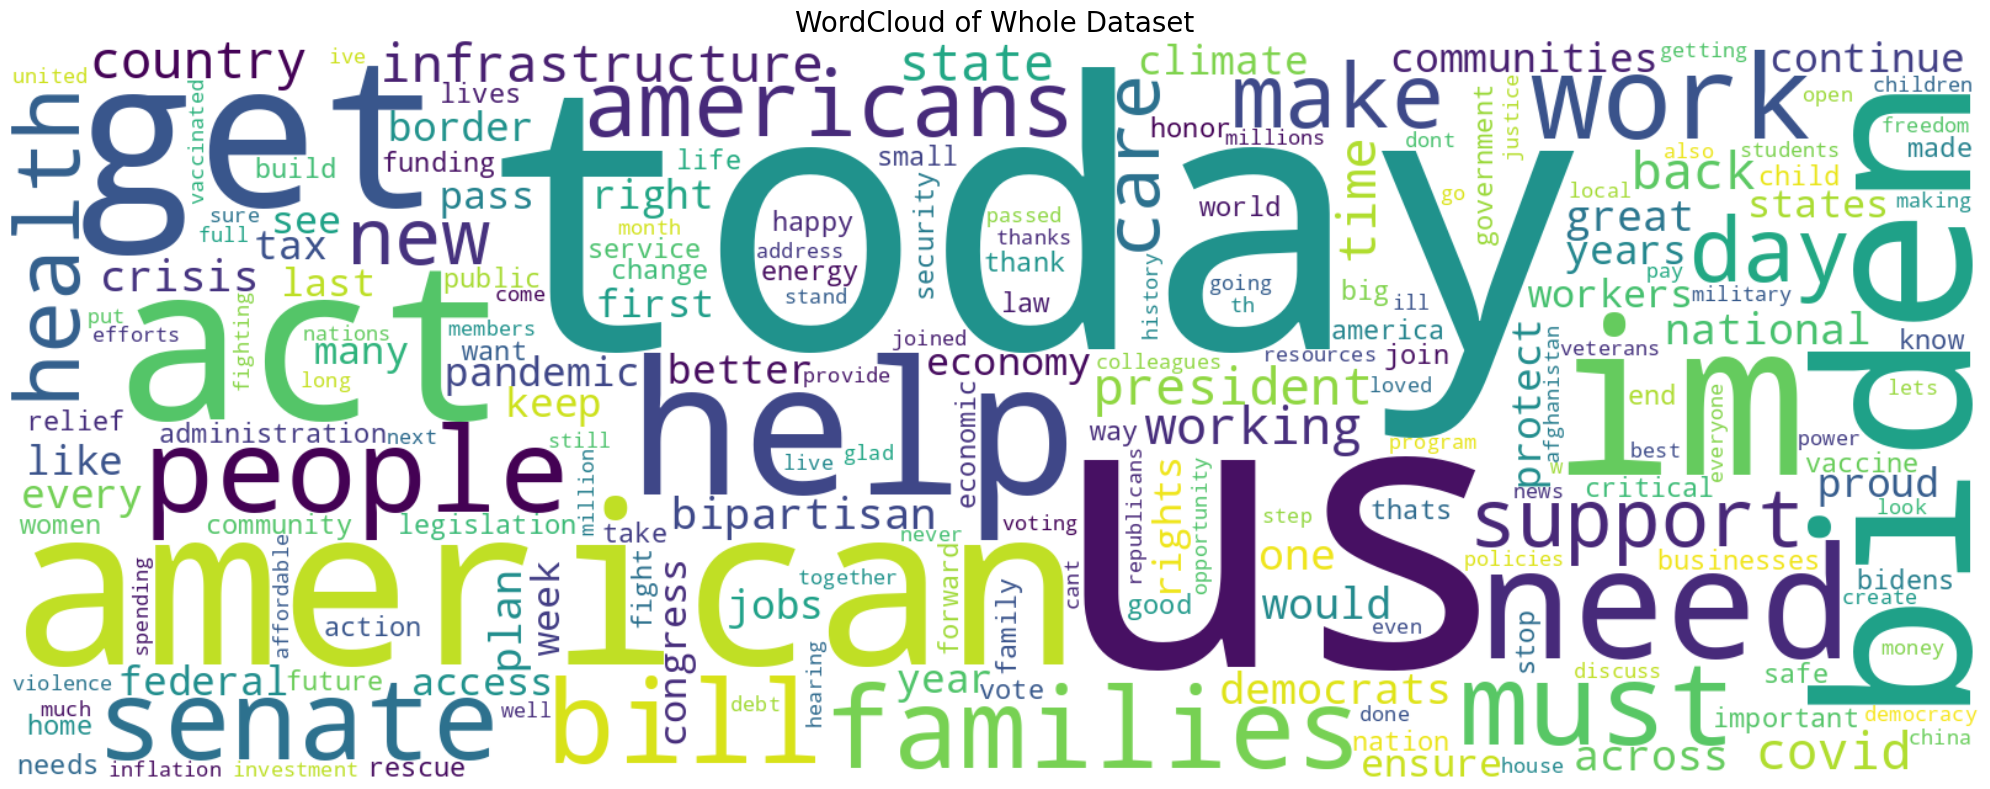

In [57]:
plt.figure(figsize=(20, 16))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Whole Dataset", fontsize=20)

plt.tight_layout()
plt.show()

In [15]:
pd.DataFrame.to_csv(df, 'dataset.csv', index=False)